# Trading CSV Slicing Notebook

- different ways to slice data
- understanding dataframes
- doing join functions to end up with a usable dataframe containing the stocks and information you want to work with

In [166]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Test that you can read a csv

In [4]:
testread = pd.read_csv("GOOG.csv")
testread

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500
2,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
3,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
4,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
5,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
6,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
7,2018-01-09,1109.400024,1110.569946,1101.230957,1106.260010,1106.260010,902500
8,2018-01-10,1097.099976,1104.599976,1096.109985,1102.609985,1102.609985,1042800
9,2018-01-11,1106.300049,1106.525024,1099.589966,1105.520020,1105.520020,978300


## Test that you can Plot the data

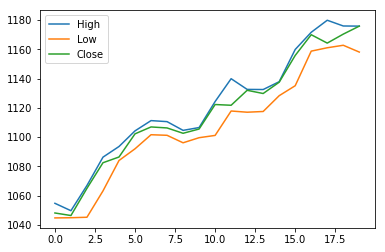

In [151]:
def plot():
    csv = pd.read_csv("GOOG.csv")
    #print(csv['High'])
    csv[['High', 'Low','Close']].plot()
    plt.show()

plot()

# Now importing multiple stocks

- specify a date range
- specify the symbols
- create a dataframe using inxes = dates
- For Loop iterate over symbols and do a left inner join onto df1 from stock chart

In [158]:
dates = pd.date_range('2018-01-02', '2018-01-26')
symbols = ['GOOG', 'AAPL', 'AMZN', 'BTC-USD', 'XRP-USD', 'XLM-USD']

In [159]:
print(dates)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13',
               '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26'],
              dtype='datetime64[ns]', freq='D')


In [164]:
df1 = pd.DataFrame(index=dates)
# print(df1)

In [165]:
for symbol in symbols:
    temp_df = pd.read_csv('{}.csv'.format(symbol), index_col="Date", parse_dates=True, usecols=['Date', 'High', 'Adj Close'], na_values=['NaN'])
    temp_df = temp_df.rename(columns={'Adj Close': symbol + ' Close ', 'High':symbol + ' High '})
    df1 = df1.join(temp_df, how='inner').dropna()
df1

,GOOG High,GOOG Close,AAPL High,AAPL Close,AMZN High,AMZN Close,BTC-USD High,BTC-USD Close,XRP-USD High,XRP-USD Close,XLM-USD High,XLM-USD Close
2018-01-02,1066.939941,1065.000000,172.300003,172.259995,1190.000000,1189.010010,15306.129883,14754.129883,2.21,2.19,0.5898,0.5560
2018-01-03,1086.290039,1082.479980,174.550003,172.229996,1205.489990,1204.199951,15435.009766,15156.620117,2.85,2.73,0.9199,0.8848
2018-01-04,1093.569946,1086.400024,173.470001,173.029999,1215.869995,1209.589966,15408.660156,15180.080078,3.29,2.73,0.9100,0.6950
2018-01-05,1104.250000,1102.229980,175.369995,175.000000,1229.140015,1229.140015,17126.949219,16954.779297,3.05,2.51,0.7800,0.6400
2018-01-08,1111.270020,1106.939941,175.610001,174.350006,1253.079956,1246.869995,16302.919922,14976.169922,2.78,2.41,0.7090,0.6140
2018-01-09,1110.569946,1106.260010,175.059998,174.330002,1259.329956,1252.699951,15390.280273,14468.500000,2.50,2.06,0.6430,0.5614
2018-01-10,1104.599976,1102.609985,174.300003,174.289993,1254.329956,1254.329956,14919.490234,14919.490234,2.13,1.95,0.5744,0.5590
2018-01-11,1106.525024,1105.520020,175.490005,175.279999,1276.770020,1276.680054,14979.959961,13308.059570,2.24,1.93,0.6300,0.5567
2018-01-12,1124.290039,1122.260010,177.360001,177.089996,1305.760010,1305.199951,14129.080078,13841.190430,2.16,2.02,0.7113,0.6720
2018-01-16,1139.910034,1121.760010,179.389999,176.190002,1339.939941,1304.859985,13648.839844,11282.490234,1.68,1.15,0.6020,0.4301
